In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import re
import matplotlib.pyplot as plt

In [5]:
column_names = ['Temperature', 
               'RelativeLuminosity',
               'RelativeRadius',
               'ApparentMagnitude',
               'Color',
               'SpectralClass',
               'Type']
df = pd.read_csv('./archive/Stars.csv', names=column_names, header=0)

print(df.shape)
df.head()

(240, 7)


,Temperature,RelativeLuminosity,RelativeRadius,ApparentMagnitude,Color,SpectralClass,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


## EDA with D-tale library

In [69]:
!pip3 install dtale

Looking in indexes: https://pypi.org/simple, https://****@pypi.fury.io/altaml
     |████████████████████████████████| 14.4 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 759 kB 52.2 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 3.7 MB/s  eta 0:00:01
     |████████████████████████████████| 47 kB 6.4 MB/s  eta 0:00:01
     |████████████████████████████████| 1.8 MB 30.7 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 4.4 MB/s  eta 0:00:01
     |████████████████████████████████| 79.9 MB 42.1 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 9.8 MB/s  eta 0:00:011
     |████████████████████████████████| 191 kB 27.3 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 998 kB/s  eta 0:00:01
     |████████████████████████████████| 642 kB 23.0 MB/s eta 0:00:01
  Using cached Brotli-1.0.9-cp38-cp38-manylinux1_x86_64.whl (357 kB)
     |████████████████████████████████| 3.5 MB 57.1 MB/s eta 0:00:01
     |██████████████████████

In [6]:
import dtale

dtale.show(df)

In [ ]:
# Just Format Fixing the Color Feature

In [37]:
def formatColor(x):
    x = re.sub("[^A-Za-z]", "", x.lower())
    return x

df['Color'] = df['Color'].apply(lambda x: formatColor(x))

In [38]:
#Label Encoding

le = LabelEncoder()

# columns to select for encoding
selected_col = ['Color','SpectralClass']

le.fit(df[selected_col].values.flatten())

df[selected_col] = df[selected_col].apply(le.fit_transform)

In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         240 non-null    int64  
 1   RelativeLuminosity  240 non-null    float64
 2   RelativeRadius      240 non-null    float64
 3   ApparentMagnitude   240 non-null    float64
 4   Color               240 non-null    int64  
 5   SpectralClass       240 non-null    int64  
 6   Type                240 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 13.2 KB


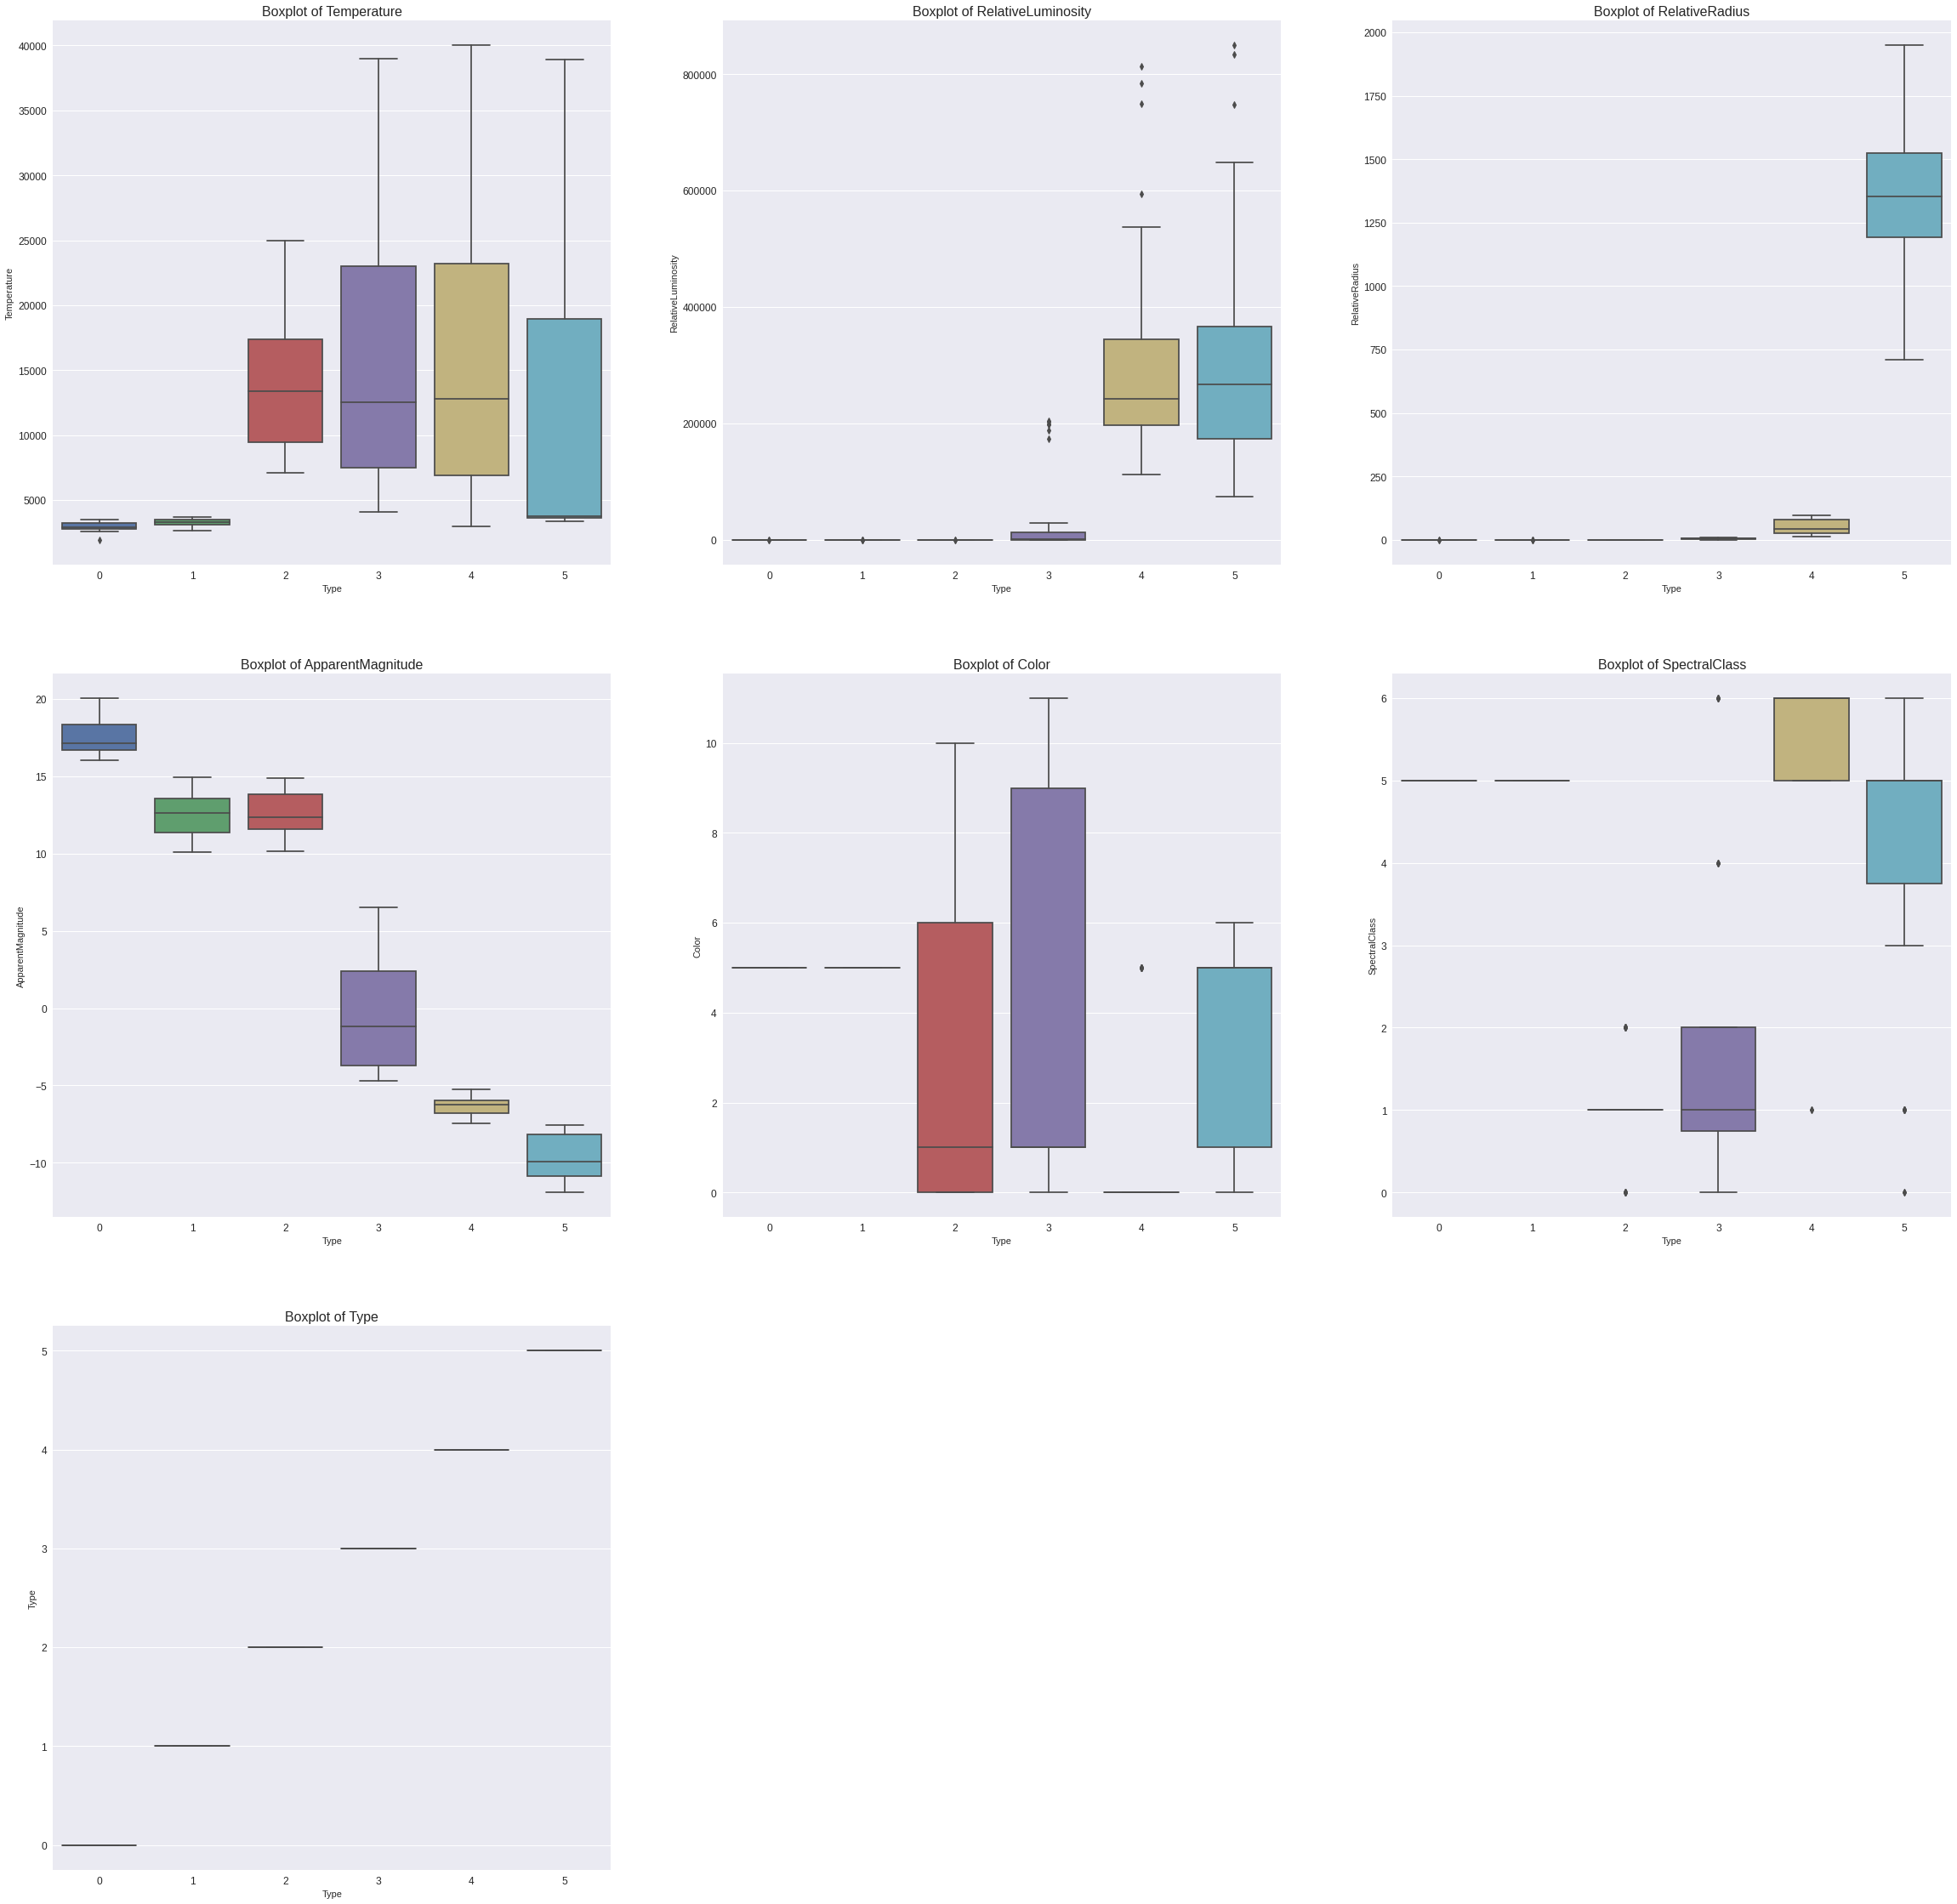

In [40]:
#Box Plotting All features distribution corresponding Target column
i=1
plt.figure(figsize=(40,40))
for c in df.columns[:]:
    plt.subplot(3,3,i)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['Type'])
    i+=1
plt.show()

In [41]:
df.columns

Index(['Temperature', 'RelativeLuminosity', 'RelativeRadius',
       'ApparentMagnitude', 'Color', 'SpectralClass', 'Type'],
      dtype='object')

In [42]:
# the data columns
cols = ['Temperature', 'RelativeLuminosity', 'RelativeRadius',
       'ApparentMagnitude', 'Color', 'SpectralClass']
target = ["Type"]

/home/harshal/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/harshal/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/harshal/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

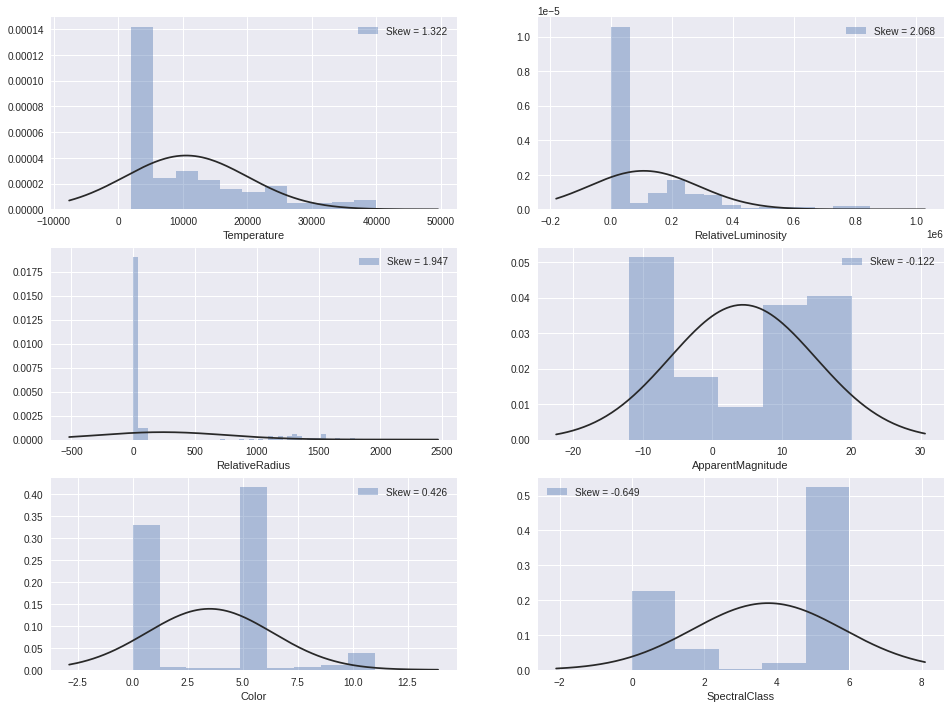

In [44]:
fig,ax = plt.subplots(3,2, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

In [47]:
#checking the target variable countplot

print("class :", df["Type"].unique())
print()

print("Value Count :",df["Type"].value_counts(), end="\n")


class : [0 1 2 3 4 5]

Value Count : 5    40
4    40
3    40
2    40
1    40
0    40
Name: Type, dtype: int64


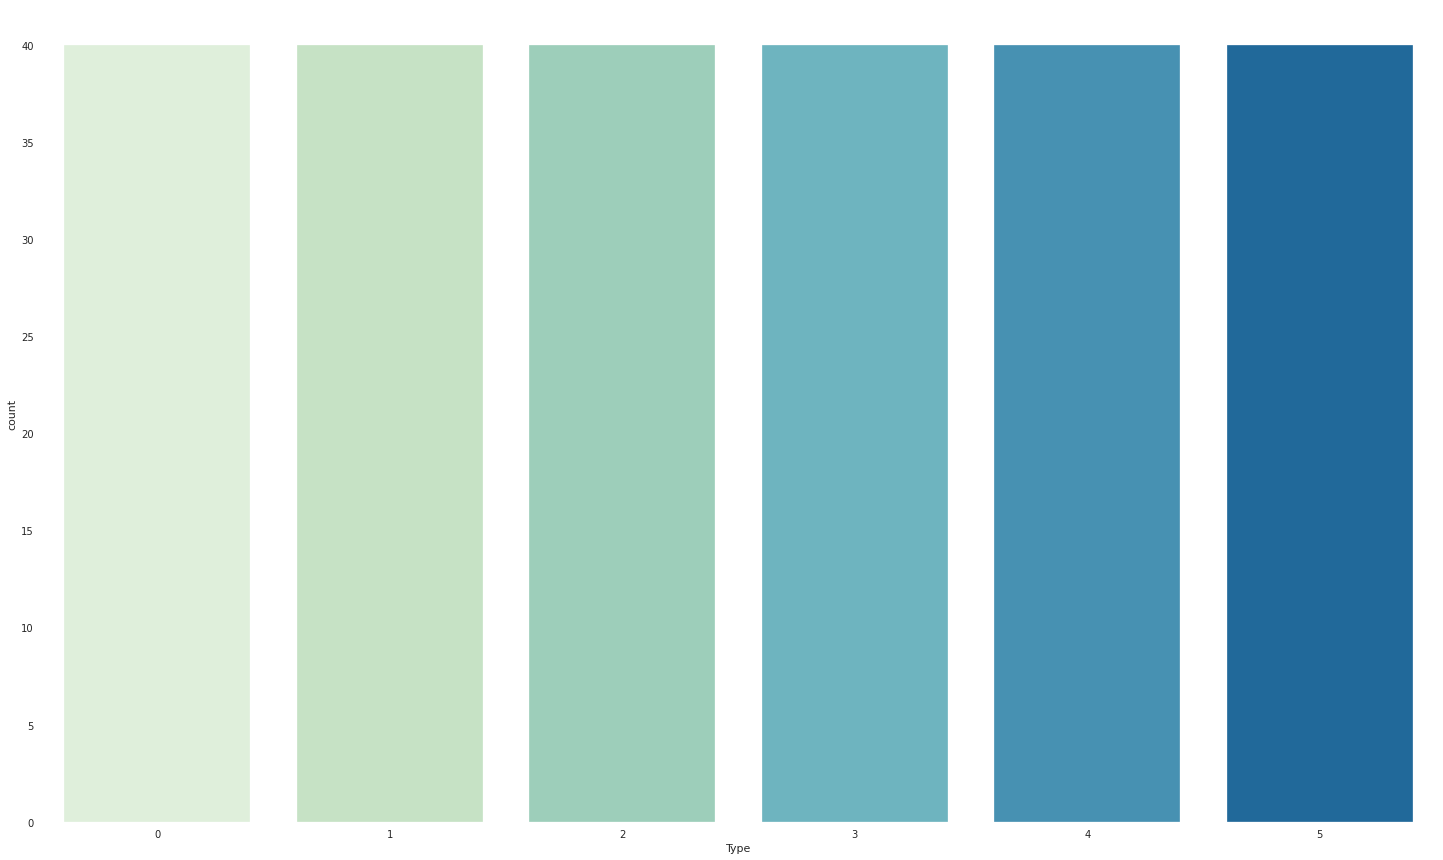

In [48]:
#checking the target variable countplot

plt.figure(figsize=(25,15))
sns.set_style('white')
sns.countplot(x='Type', data = df, palette='GnBu')
sns.despine(left=True)

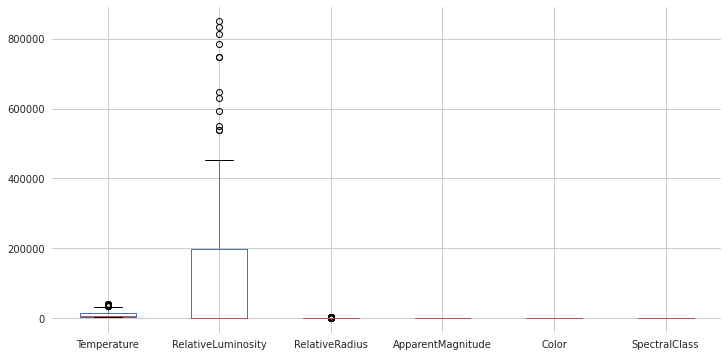

In [49]:
df.iloc[:,:-1].boxplot(figsize=(12,6))
plt.show()

/home/harshal/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/harshal/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/harshal/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

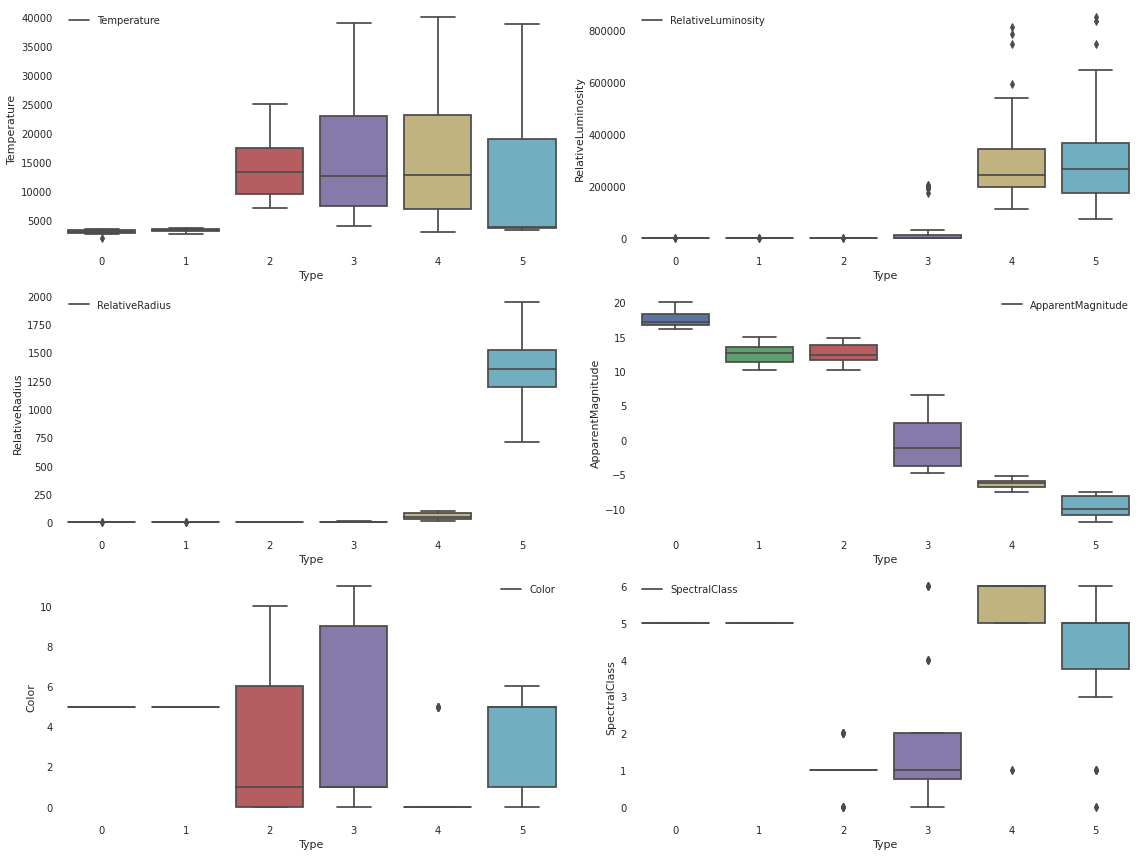

In [50]:
fig,ax = plt.subplots(3,2, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    sns.boxplot("Type", col, ax = ax[i], data=df)
    ax[i].legend([col], loc='best')
    i += 1
plt.tight_layout()
plt.show()

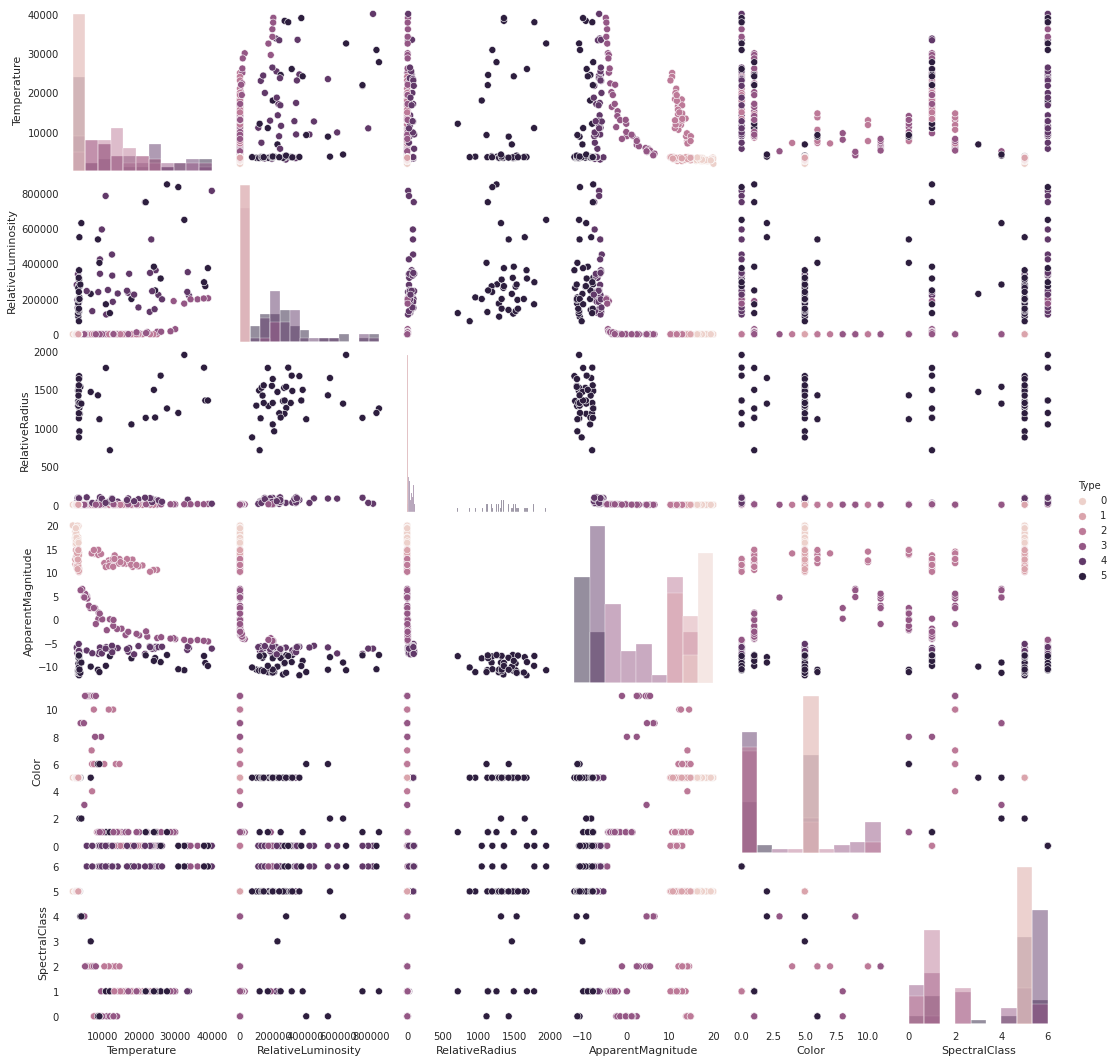

In [52]:
#Pairplot
sns.pairplot(df, hue='Type', diag_kind='hist')
plt.show()

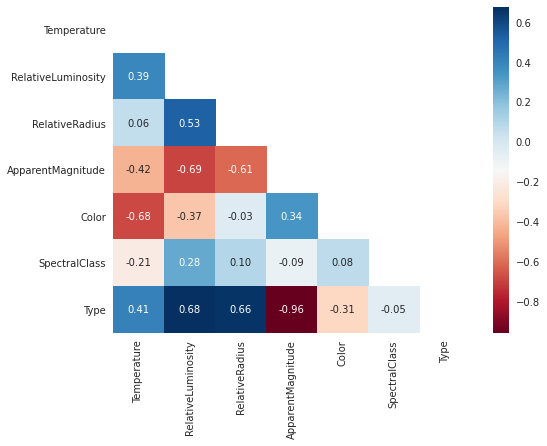

In [55]:
plt.figure(figsize=(8,6))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, fmt= '.2f', cmap='RdBu', mask=mask)
plt.show()

In [54]:
import statsmodels.api as sm
import statsmodels.stats as sms

for col in cols:
    data = sm.formula.ols(col+"~ Type", data=df).fit()
    pval = sms.anova.anova_lm(data)["PR(>F)"][0]
    print(f"Pval for {col}: {pval}")

Pval for Temperature: 3.323401956092008e-11
Pval for RelativeLuminosity: 1.641155523850019e-33
Pval for RelativeRadius: 1.6272694239287043e-31
Pval for ApparentMagnitude: 6.33087509199811e-128
Pval for Color: 1.047429715544047e-06
Pval for SpectralClass: 0.44868186785826514


In [68]:
from sklearn.feature_selection import chi2

chi_scores = chi2(df[['Color', 'SpectralClass']], df[target])

p_values = pd.Series(chi_scores[1],index = df[['Color', 'SpectralClass']].columns)
p_values.sort_values(ascending = False , inplace = True)
print(p_values)

Color            8.716079e-26
SpectralClass    1.167568e-37
dtype: float64